# 라이브러리 임포트

In [27]:
#기본
import pandas as pd
import numpy as np

#임베딩
from gensim.models.doc2vec import TaggedDocument
from gensim.models import Doc2Vec   

#PCA
from sklearn.decomposition import PCA

#클러스터링
from sklearn.cluster import DBSCAN
import hdbscan
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#시각화
import matplotlib.pyplot as plt
import seaborn as sns

#tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer

# 데이터 불러오기

In [2]:
df = pd.read_csv(r"C:\Users\ehdgo\OneDrive - 계명대학교\대학\동아리\2023 1,2학기 학술\클롤링\전처리\아프니까사장이다 형태소 분석 완료_인터넷뱅킹.csv")

In [3]:
df

,Unnamed: 0,review,tokenized_review
0,0,카카오뱅크 개인사업사 보증서대출 지금 신청한지 일정도 됬는데 아직 아무런 움직임이 ...,"['카카오', '뱅크', '개인', '사업', '사', '보증', '대출', '지금..."
1,1,오늘 하루도 화이팅입니다 사장님 뉴스 공유드려요.오늘 하루 매출도 화이팅입니다 ...,"['오늘', '하루', '화이팅', '입니다', '사장', '님', '뉴스', '공..."
2,2,정보 공유 합니다 당분간 꾸준히 사장님들께 도움 되는 뉴스 기사 스크래핑 해서 ...,"['정보', '공유', '합니다', '당분간', '꾸준히', '사', '장님', '..."
3,3,현재보증대출 천 백 남았는데요.추가로 더못받겠지요,"['현재', '보증', '대출', '천', '백', '남았는데요', '.', '추가..."
4,4,카카오뱅크 사업자 보증서대출 오래걸리나요 최대 한도 천으로 나오길래 우선 천적었는데...,"['카카오', '뱅크', '사업자', '보증', '대출', '오래', '걸리나요',..."
...,...,...,...
260949,260949,세종시에서 장사하느니 부산에서 하는게 나아요 세종시 호락호락하지 않아요 그래서 저는...,"['세종시', '장사', '하느니', '부산', '하는게', '나아요', '세종시'..."
260950,260950,저도 예비창업자인데 이래저래 고민이 많은데,"['저', '예비', '창업', '자', '이래저래', '고민', '많은데']"
260951,260951,상가 위치는 어디일까요,"['상가', '위치', '어디', '일까', '요']"
260952,260952,지금 현재는 어느업종으로 임대중인가요,"['지금', '현재', '어느', '업종', '임대', '중']"


In [4]:
df = df.dropna(subset=['review'])

In [5]:
df_list = df['tokenized_review']

# Doc2Vec_임베딩

In [6]:
# TaggedDocument 생성
tagged_data = [TaggedDocument(words=_d, tags=[str(i)]) for i, _d in enumerate(df['tokenized_review'])]

# 모델 초기화, 훈련데이터에 어휘 구축, 모델 훈련
model = Doc2Vec(vector_size=50, min_count=2, epochs=40)
model.build_vocab(tagged_data)
model.train(tagged_data, total_examples=model.corpus_count, epochs=model.epochs)

# 벡터 추출 및 병합
vector = [model.dv[str(i)].tolist() for i in range(len(tagged_data))]
df['vector'] = vector

C:\Users\ehdgo\AppData\Local\Temp\ipykernel_21900\471840520.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['vector'] = vector


# PCA_차원축소

In [7]:
# vector array 생성
vector_array = np.array(df['vector'].tolist())

#pca 수행
pca = PCA(n_components=2)
pca_result = pca.fit_transform(vector_array)

# 데이터프레임으로 저장
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])

# DBSCAN

In [ ]:
# DBSCAN 모델 생성 및 훈련
dbscan = DBSCAN(eps=0.3, min_samples=5)  # eps와 min_samples는 상황에 따라 조정 가능
dbscan_labels = dbscan.fit_predict(pca_df)

# 클러스터 레이블을 데이터프레임에 추가
df['DBSCAN_labels'] = dbscan_labels

C:\Users\ehdgo\AppData\Local\Temp\ipykernel_35160\1122823483.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DBSCAN_labels'] = dbscan_labels


# HDBSCAN

In [ ]:
# HDBSCAN 모델 생성 및 훈련
hdbscan_model = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=2)  # 파라미터는 상황에 따라 조정
hdbscan_labels = hdbscan_model.fit_predict(pca_df)

# 클러스터 레이블을 데이터프레임에 추가
df['HDBSCAN_labels'] = hdbscan_labels

C:\Users\ehdgo\AppData\Local\Temp\ipykernel_35160\2509428215.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['HDBSCAN_labels'] = hdbscan_labels


# KMeans

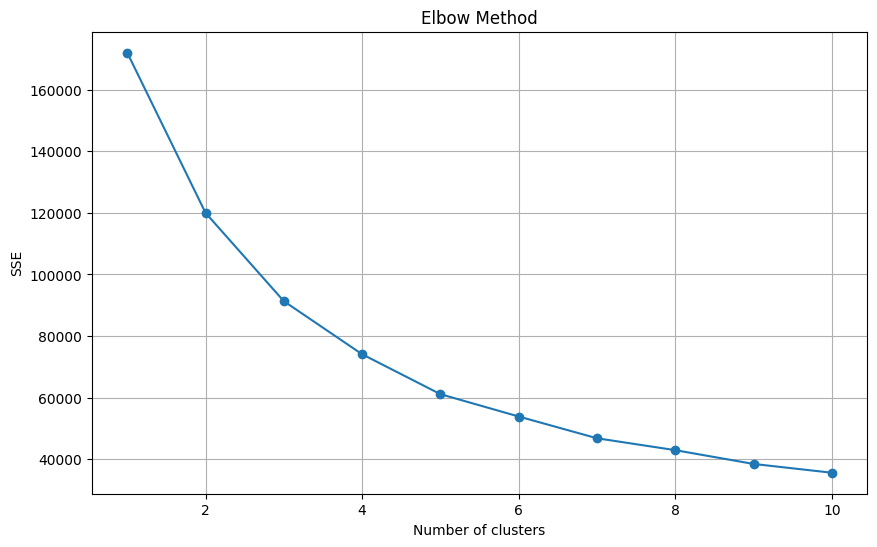

In [10]:
# 데이터 준비
data = pca_df  # PCA 결과 데이터

# 엘보우 방법을 사용하여 최적의 군집 수 찾기
sse = []
for k in range(1, 11):  # 군집 수 1부터 10까지 시도
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    sse.append(kmeans.inertia_)  # 군집화 후 SSE 값 저장

# SSE 값의 변화를 시각화
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.grid(True)
plt.show()

In [19]:
# 실루엣 분석을 사용하여 최적의 군집 수 찾기
silhouette_coeffs = []
for k in range(2, 12):  # 군집 수가 1인 경우는 실루엣 스코어를 계산할 수 없으므로 2부터 시작
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans_labels = kmeans.fit_predict(data)
    score = silhouette_score(data, kmeans_labels)
    silhouette_coeffs.append(score)

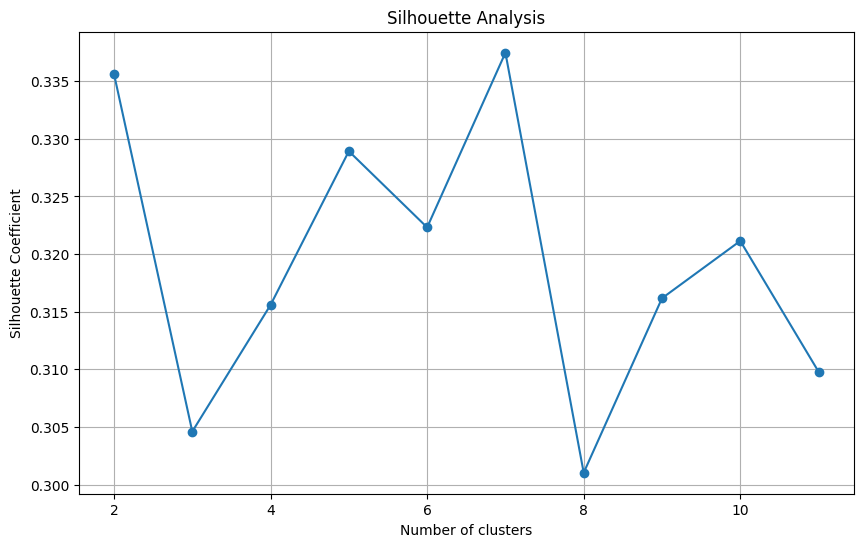

In [20]:
# 실루엣 스코어의 변화를 시각화
plt.figure(figsize=(10, 6))
plt.plot(range(2, 12), silhouette_coeffs, marker='o')
plt.title('Silhouette Analysis')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)
plt.show()

In [21]:
# K-means 클러스터링 모델 생성 및 훈련
kmeans = KMeans(n_clusters=7, random_state=42)  # n_clusters는 필요에 따라 조정할 수 있습니다.
kmeans_labels = kmeans.fit_predict(pca_df)

# 클러스터 레이블을 데이터프레임에 추가
df['KMeans_labels'] = kmeans_labels

C:\Users\ehdgo\AppData\Local\Temp\ipykernel_21900\3685780600.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['KMeans_labels'] = kmeans_labels


# 클러스터링 시각화

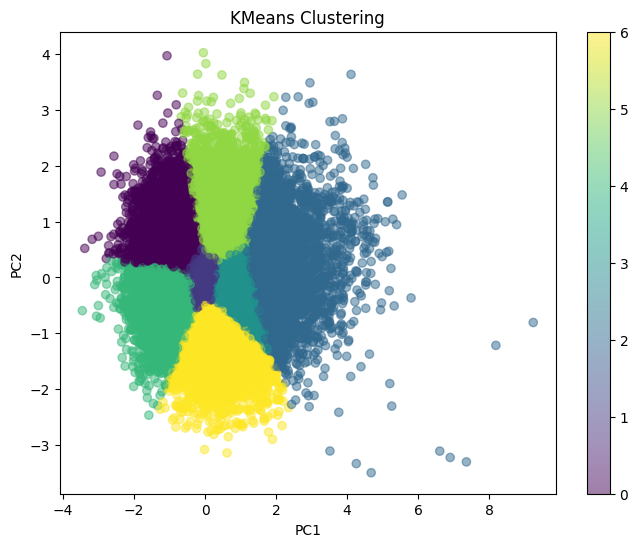

In [22]:
import matplotlib.pyplot as plt

# 시각화 함수 정의
def plot_clusters(data, labels, title):
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(data['PC1'], data['PC2'], c=labels, cmap='viridis', alpha=0.5)
    plt.title(title)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.colorbar(scatter)
    plt.show()

# # DBSCAN 결과 시각화
# plot_clusters(pca_df, df['DBSCAN_labels'], 'DBSCAN Clustering')

# # HDBSCAN 결과 시각화
# plot_clusters(pca_df, df['HDBSCAN_labels'], 'HDBSCAN Clustering')

# 와드 클러스터링 결과 시각화
plot_clusters(pca_df, df['KMeans_labels'], 'KMeans Clustering')

# TF-IDF

In [14]:
df.to_csv(r'클러스터링 예시.csv')

In [26]:
df

,Unnamed: 0,review,tokenized_review,vector,KMeans_labels
0,0,카카오뱅크 개인사업사 보증서대출 지금 신청한지 일정도 됬는데 아직 아무런 움직임이 ...,"['카카오', '뱅크', '개인', '사업', '사', '보증', '대출', '지금...","[0.8195480704307556, 0.35849854350090027, -1.0...",4
1,1,오늘 하루도 화이팅입니다 사장님 뉴스 공유드려요.오늘 하루 매출도 화이팅입니다 ...,"['오늘', '하루', '화이팅', '입니다', '사장', '님', '뉴스', '공...","[-1.0223824977874756, 1.0043426752090454, -0.0...",6
2,2,정보 공유 합니다 당분간 꾸준히 사장님들께 도움 되는 뉴스 기사 스크래핑 해서 ...,"['정보', '공유', '합니다', '당분간', '꾸준히', '사', '장님', '...","[-0.06160370633006096, 0.2942633628845215, 0.3...",2
3,3,현재보증대출 천 백 남았는데요.추가로 더못받겠지요,"['현재', '보증', '대출', '천', '백', '남았는데요', '.', '추가...","[-0.5694369673728943, -0.3158784806728363, -0....",4
4,4,카카오뱅크 사업자 보증서대출 오래걸리나요 최대 한도 천으로 나오길래 우선 천적었는데...,"['카카오', '뱅크', '사업자', '보증', '대출', '오래', '걸리나요',...","[0.05063173919916153, -0.6130995154380798, -0....",0
...,...,...,...,...,...
260948,260948,직장다니시는게 답입니다,"['직장', '다니시는게', '답', '입니다']","[-0.046942088752985, -0.004454211797565222, 0....",1
260949,260949,세종시에서 장사하느니 부산에서 하는게 나아요 세종시 호락호락하지 않아요 그래서 저는...,"['세종시', '장사', '하느니', '부산', '하는게', '나아요', '세종시'...","[0.43639254570007324, 0.3083159923553467, 0.08...",6
260950,260950,저도 예비창업자인데 이래저래 고민이 많은데,"['저', '예비', '창업', '자', '이래저래', '고민', '많은데']","[-0.41697800159454346, 0.4488966464996338, -0....",6
260951,260951,상가 위치는 어디일까요,"['상가', '위치', '어디', '일까', '요']","[-0.041053444147109985, -0.02370130829513073, ...",1


In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# 클러스터링 결과에 따라 텍스트 데이터를 그룹화
cluster_groups = df.groupby('KMeans_labels')['review']

# TF-IDF 벡터라이저 초기화
tfidf_vectorizer = TfidfVectorizer()

# 각 클러스터의 상위 10개 TF-IDF 단어를 저장할 딕셔너리
top_tfidf_by_cluster = {}

for cluster_label, texts in cluster_groups:
    # 클러스터 내의 텍스트에 대해 TF-IDF 계산
    tfidf_matrix = tfidf_vectorizer.fit_transform(texts)
    feature_array = tfidf_vectorizer.get_feature_names_out()
    
    # 각 단어의 평균 TF-IDF 값을 계산
    tfidf_means = tfidf_matrix.mean(axis=0).A1
    tfidf_df = pd.DataFrame({'word': feature_array, 'tfidf': tfidf_means})
    
    # 평균 TF-IDF 값이 높은 순으로 정렬하여 상위 10개 추출
    top_tfidf = tfidf_df.sort_values('tfidf', ascending=False).head(10)
    
    # 결과 저장
    top_tfidf_by_cluster[cluster_label] = top_tfidf


In [40]:
# 각 클러스터별 상위 10개의 TF-IDF 단어를 출력
for cluster_label, top_tfidf in top_tfidf_by_cluster.items():
    print(f"Cluster {cluster_label} top TF-IDF words:")
    print(top_tfidf)
    print("\n")

Cluster 0 top TF-IDF words:
        word     tfidf
62384     저도  0.013796
62288     저는  0.009989
81560     혹시  0.008956
16776     대출  0.008397
51910     오늘  0.005660
28058     바로  0.005203
1486   감사합니다  0.004920
65768     제가  0.004415
77652   하나은행  0.004254
19651    되나요  0.004143


Cluster 1 top TF-IDF words:
          word     tfidf
2054     감사합니다  0.061183
19011      네이버  0.008157
87731       저도  0.007732
91232       정보  0.006769
115040    힘내세요  0.006681
50520      사장님  0.006606
93525       좋은  0.005463
102324   축하드려요  0.004956
102340  축하드립니다  0.004517
10705     그렇군요  0.004278


Cluster 2 top TF-IDF words:
        word     tfidf
100946  있습니다  0.008946
28034     대출  0.008602
100751    있는  0.006478
135989   합니다  0.006230
66914   소상공인  0.006220
37867     만원  0.005970
38333     많이  0.005175
73794     신청  0.005007
100335   입니다  0.004960
114808    지원  0.004707


Cluster 3 top TF-IDF words:
        word     tfidf
1907   감사합니다  0.010098
22111     대출  0.004282
88212     진짜  0.004248
16392    